In [44]:
import numpy as np 
import matplotlib.pyplot as plt 
import uncertainties as unc
import pandas as pd
import uncertainties.unumpy as unp

In [45]:
data = pd.read_csv('range.csv')
data

,DEPTH,Ga,O,Si,C
0,5.51,0.00,34113000.0,28574000.0,60183.0
1,11.01,0.00,31297000.0,33424000.0,47455.0
2,16.51,0.00,40541000.0,41948000.0,73274.0
3,22.01,727.28,47372000.0,48753000.0,116910.0
4,27.51,363.64,53420000.0,54613000.0,220730.0
...,...,...,...,...,...
95,528.01,0.00,0.0,0.0,0.0
96,533.51,0.00,0.0,0.0,0.0
97,539.01,0.00,0.0,0.0,0.0
98,544.51,0.00,0.0,0.0,0.0


In [46]:
depth = data['DEPTH']
si = data['Si']

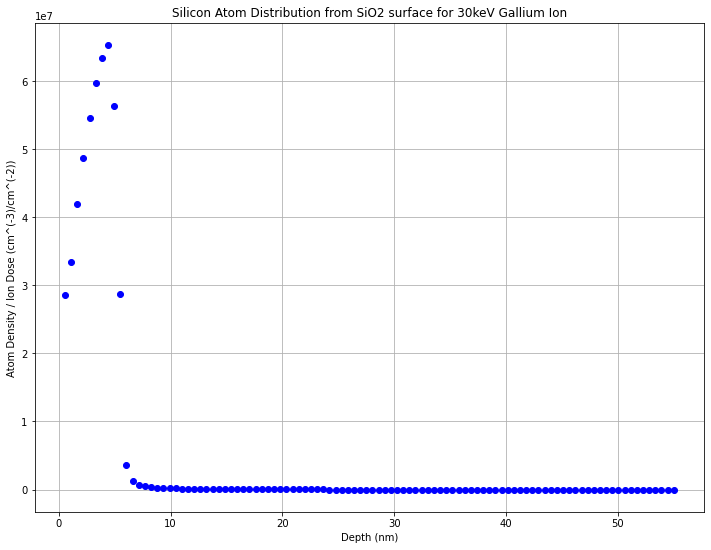

In [47]:
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.xlabel(r'Depth (nm)')
plt.ylabel(r'Atom Density / Ion Dose (cm^(-3)/cm^(-2))')
plt.title('Silicon Atom Distribution from SiO2 surface for 30keV Gallium Ion')
plt.plot(depth/10,si,'ob')

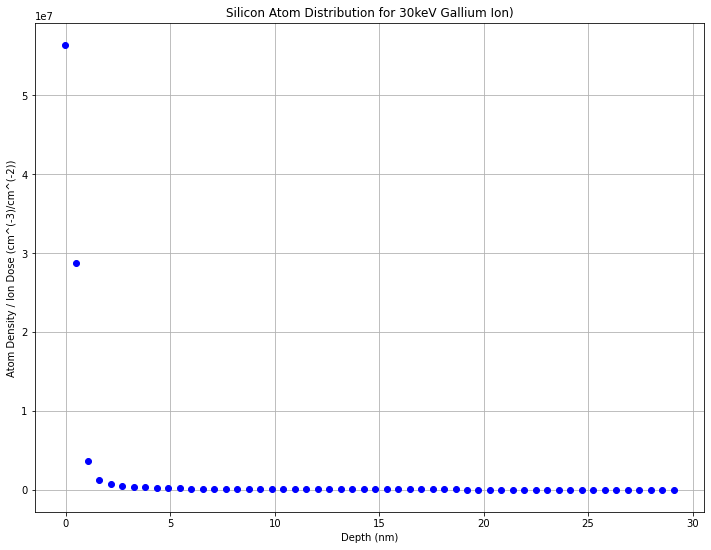

In [48]:
Index = list(range(8,62))
myfig = plt.figure(figsize=(12,9))
newd = (depth/10)[Index]-5
newsi = si[Index]
plt.grid()
plt.xlabel(r'Depth (nm)')
plt.ylabel(r'Atom Density / Ion Dose (cm^(-3)/cm^(-2))')
plt.title('Silicon Atom Distribution for 30keV Gallium Ion)')
plt.plot(newd ,newsi,'ob')

In [49]:
from lmfit.models import ExponentialModel

model1 = ExponentialModel() 
model = model1
params = model.make_params()
print('parameter names: {}'.format(model.param_names))

parameter names: ['amplitude', 'decay']


[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 54
    # variables        = 2
    chi-square         = 7.2681e+13
    reduced chi-square = 1.3977e+12
    Akaike info crit   = 1512.11854
    Bayesian info crit = 1516.09651
    R-squared          = 0.98117106
[[Variables]]
    amplitude:  53103071.4 +/- 1020844.32 (1.92%) (init = 5e+07)
    decay:      0.59733759 +/- 0.02578902 (4.32%) (init = 2)


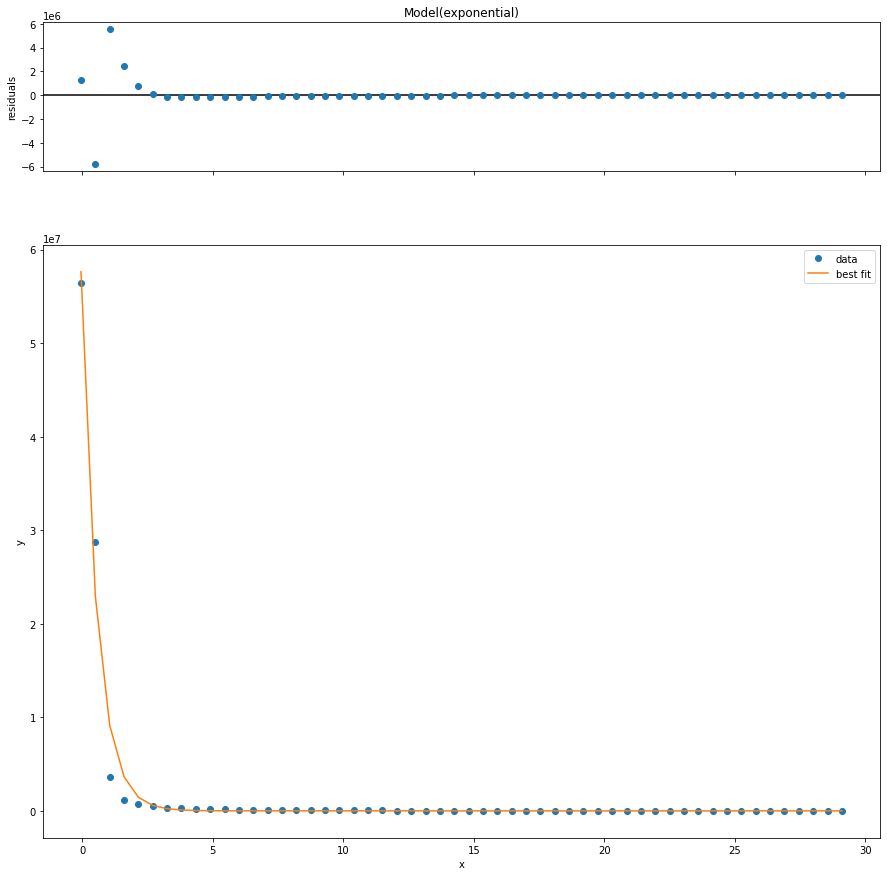

In [50]:
params['amplitude'].set(value = 5e7, vary=True)
params['decay'].set(value = 2, vary=True)
model_fit = model.fit(newsi, params, x=newd)
print(model_fit.fit_report(show_correl=False))
myfig=plt.figure(figsize=(15,15))
model_fit.plot(fig=myfig);

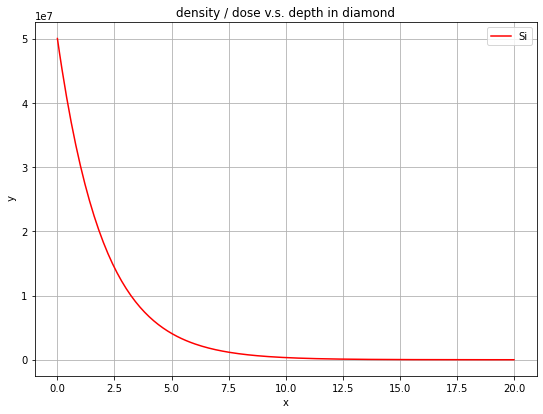

In [51]:
fit_x = np.linspace(0,20,200)
fitcurve = model.eval(params, x = fit_x)
plt.figure(figsize=(9,6.5))
plt.grid()
plt.title('density / dose v.s. depth in diamond')
plt.xlabel(r'x')
plt.ylabel(r' y')
plt.plot(fit_x, fitcurve, '-r',label = 'Si')
plt.legend()

In [52]:
density = fitcurve * 2.35e23
diamondDensity = 1.76e23
ppm = density/(diamondDensity*1e6)

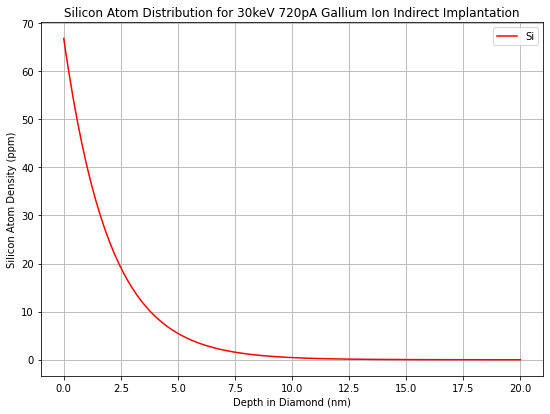

In [53]:
plt.figure(figsize=(9,6.5))
plt.grid()
plt.title('Silicon Atom Distribution for 30keV 720pA Gallium Ion Indirect Implantation')
plt.xlabel(r'Depth in Diamond (nm)')
plt.ylabel(r'Silicon Atom Density (ppm)')
plt.plot(fit_x, ppm, '-r',label = 'Si')
plt.legend()

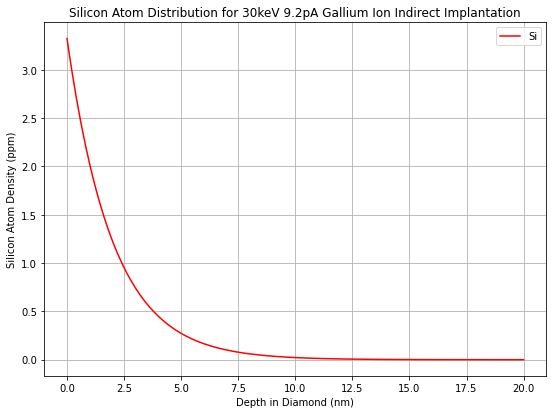

In [54]:
density = fitcurve * 1.17e22
diamondDensity = 1.76e23
ppm2 = density/(diamondDensity*1e6)
plt.figure(figsize=(9,6.5))
plt.grid()
plt.title('Silicon Atom Distribution for 30keV 9.2pA Gallium Ion Indirect Implantation')
plt.xlabel(r'Depth in Diamond (nm)')
plt.ylabel(r'Silicon Atom Density (ppm)')
plt.plot(fit_x, ppm2, '-r',label = 'Si')
plt.legend()

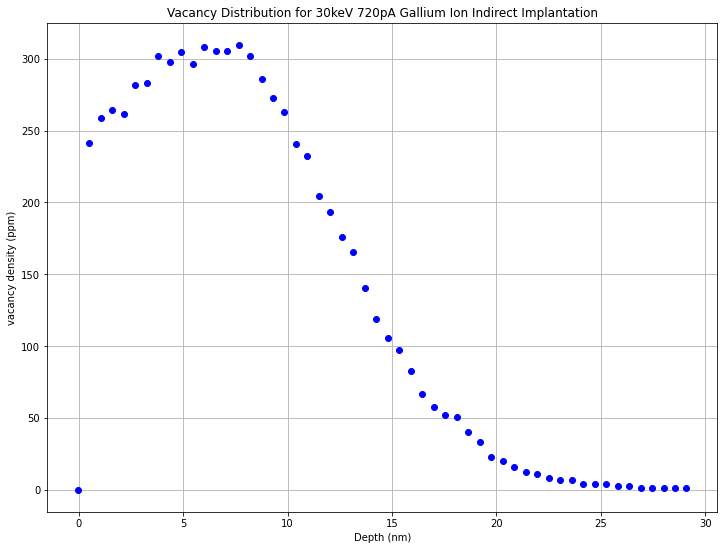

In [55]:
vacancy = pd.read_csv('vacancy.csv')
carbonv = vacancy['C']
vacancyppm = carbonv * 1e8 * 2.35e23 / (diamondDensity*1e6)
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.xlabel(r'Depth (nm)')
plt.ylabel(r'vacancy density (ppm)')
plt.title('Vacancy Distribution for 30keV 720pA Gallium Ion Indirect Implantation')
plt.plot((depth[Index]/10)-5,vacancyppm[Index],'ob')


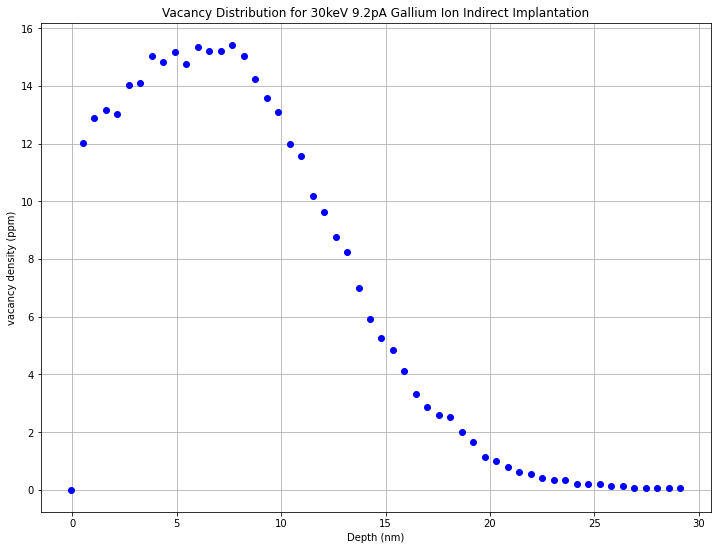

In [56]:
vacancyppm2 = carbonv * 1e8 * 1.17e22 / (diamondDensity*1e6)
myfig = plt.figure(figsize=(12,9))
plt.grid()
plt.xlabel(r'Depth (nm)')
plt.ylabel(r'vacancy density (ppm)')
plt.title('Vacancy Distribution for 30keV 9.2pA Gallium Ion Indirect Implantation')
plt.plot((depth[Index]/10)-5,vacancyppm2[Index],'ob')

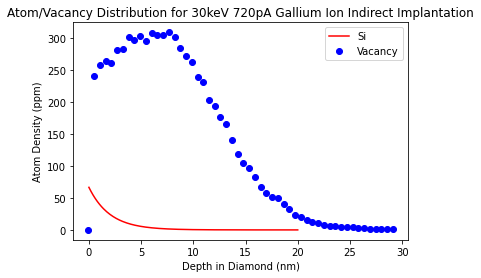

In [57]:
plt.grid()
plt.xlabel(r'Depth in Diamond (nm)')
plt.ylabel(r'Atom Density (ppm)')
plt.plot(fit_x, ppm, '-r',label = 'Si')
plt.title('Atom/Vacancy Distribution for 30keV 720pA Gallium Ion Indirect Implantation')
plt.plot((depth[Index]/10)-5,vacancyppm[Index],'ob',label = 'Vacancy')
plt.legend()

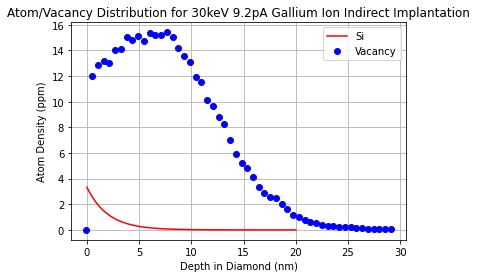

In [60]:
plt.grid()
plt.xlabel(r'Depth in Diamond (nm)')
plt.ylabel(r'Atom Density (ppm)')
plt.plot(fit_x, ppm2, '-r',label = 'Si')
plt.title('Atom/Vacancy Distribution for 30keV 9.2pA Gallium Ion Indirect Implantation')
plt.plot((depth[Index]/10)-5,vacancyppm2[Index],'ob',label = 'Vacancy')
plt.legend()